## Visualize What-If Scenarios

In [1]:
from glob import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import re
re.compile('<title>(.*)</title>')

sns.set()

### Systematically collate plant data across scenarios

In [2]:
pdata = []
for filename in sorted(glob("output/whatif-smallProblem/*plants.csv")):
    matches = re.findall(r"_cap_([0.0-9.0]*)_cost_(\d+)", filename)[0]
    cap = float(matches[0])
    cost = int(matches[1])
    pld = pd.read_csv(filename)
    pld["filename"] = filename
    pld["Storage Limit (%)"] = cap*100
    pld["Storage Cost ($/tonne/yr)"] = cost
    pdata += [pld]
    
pdata = pd.concat(pdata)
display(pdata.describe().T)

,count,mean,std,min,25%,50%,75%,max
year,150.0,3.000000e+00,1.418951e+00,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00
latitude (deg),150.0,3.358542e+01,0.000000e+00,3.358542e+01,3.358542e+01,3.358542e+01,3.358542e+01,3.358542e+01
longitude (deg),150.0,-8.437777e+01,1.568431e-13,-8.437777e+01,-8.437777e+01,-8.437777e+01,-8.437777e+01,-8.437777e+01
capacity (tonne),150.0,1.181080e+03,2.281354e-12,1.181080e+03,1.181080e+03,1.181080e+03,1.181080e+03,1.181080e+03
amount processed (tonne),150.0,1.181080e+03,2.281354e-12,1.181080e+03,1.181080e+03,1.181080e+03,1.181080e+03,1.181080e+03
amount received (tonne),150.0,1.181080e+03,5.839558e+01,1.084420e+03,1.147840e+03,1.200650e+03,1.233150e+03,1.239340e+03
amount in storage (tonne),150.0,7.903000e+01,4.610041e+01,0.000000e+00,5.826000e+01,9.666000e+01,1.103300e+02,1.299000e+02
utilization factor (%),150.0,1.000000e+02,0.000000e+00,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
energy (GJ),150.0,9.186168e+03,4.541800e+02,8.434390e+03,8.927630e+03,9.338360e+03,9.591160e+03,9.639300e+03
opening cost ($),150.0,2.272721e+06,4.560670e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.136360e+07


### Systematically collate plant output data across scenarios

In [3]:
ddata = []
for filename in sorted(glob("output/whatif-smallProblem/*outputs.csv")):
    matches = re.findall(r"_cap_([0.0-9.0]*)_cost_(\d+)", filename)[0]
#     cap = int(float(matches[0]))
#     cost = int(matches[1])
    cap = float(matches[0])
    cost = int(matches[1])
#     print(matches,'   |   ',cap, cost)
    dd = pd.read_csv(filename)
    dd["filename"] = filename
    dd["Storage Limit (%)"] = cap*100
    dd["Storage Cost ($/tonne/yr)"] = cost
    ddata += [dd]
    
ddata = pd.concat(ddata)
display(ddata.describe().T)

,count,mean,std,min,25%,50%,75%,max
year,1500.0,3.000,1.414685,1.00,2.00,3.000,4.00,5.00
amount produced (tonne),1500.0,166.539,189.993743,6.86,44.51,78.175,207.60,639.56
amount sent (tonne),1500.0,0.000,0.000000,0.00,0.00,0.000,0.00,0.00
amount disposed (tonne),1500.0,166.539,189.993743,6.86,44.51,78.175,207.60,639.56
disposal cost ($),1500.0,18568.581,39220.520132,0.00,0.00,0.000,13711.26,129830.96
Storage Limit (%),1500.0,155.000,136.427300,25.00,50.00,100.000,200.00,400.00
Storage Cost ($/tonne/yr),1500.0,200.000,202.139985,0.00,50.00,125.000,300.00,600.00


### Systematically collate transport data across scenarios

In [4]:
tdata = []
for filename in sorted(glob("output/whatif-smallProblem/*tr.csv")):
    matches = re.findall(r"_cap_([0.0-9.0]*)_cost_(\d+)", filename)[0]
    cap = float(matches[0])
    cost = int(matches[1])
    td = pd.read_csv(filename)
    td["filename"] = filename
    td["Storage Limit (%)"] = cap*100
    td["Storage Cost ($/tonne/yr)"] = cost
    tdata += [td]
    
tdata = pd.concat(tdata)
display(tdata.describe().T)

,count,mean,std,min,25%,50%,75%,max
source latitude (deg),169500.0,40.990557,2.032308e+00,26.167297,39.708379,40.889127,42.142852,48.232510
source longitude (deg),169500.0,-79.960694,7.945651e+00,-122.643929,-83.726329,-77.136507,-74.003750,-68.777814
destination latitude (deg),169500.0,33.585419,6.181740e-11,33.585419,33.585419,33.585419,33.585419,33.585419
destination longitude (deg),169500.0,-84.377769,2.904139e-10,-84.377769,-84.377769,-84.377769,-84.377769,-84.377769
year,169500.0,3.000000,1.414218e+00,1.000000,2.000000,3.000000,4.000000,5.000000
distance (km),169500.0,1122.538673,3.244045e+02,85.860000,895.450000,1099.335000,1275.870000,3487.080000
amount (tonne),169500.0,1.045230,2.771754e+00,0.060000,0.300000,0.470000,0.910000,49.580000
amount-distance (tonne-km),169500.0,1188.335524,3.106812e+03,36.470000,298.810000,505.870000,1014.140000,53648.810000
transportation cost ($),169500.0,114.584009,2.995711e+02,3.520000,28.810000,48.780000,97.790000,5173.030000
transportation energy (GJ),169500.0,3.232269,8.450530e+00,0.100000,0.810000,1.380000,2.760000,145.920000


### Prepare data for visualization

In [5]:

#Battery amount and Acquisition cost 
batteries_tonne = pdata['amount processed (tonne)'].sum()
acquisition = 358 # $/tonne

# total plant cost
pin = pdata.groupby([
    "Storage Limit (%)",
    "Storage Cost ($/tonne/yr)"
]).sum()[
    "total cost ($)"
].reset_index().pivot(
    "Storage Limit (%)",
    "Storage Cost ($/tonne/yr)",
    "total cost ($)",
)


# Transport cost
tin = tdata.groupby([
    "Storage Limit (%)",
    "Storage Cost ($/tonne/yr)"
]).sum()['transportation cost ($)'].reset_index().pivot(
    "Storage Limit (%)",
    "Storage Cost ($/tonne/yr)",
    "transportation cost ($)",
)

# disposal cost
din = ddata.groupby([
    "Storage Limit (%)",
    "Storage Cost ($/tonne/yr)"
]).sum()['disposal cost ($)'].reset_index().pivot(
    "Storage Limit (%)",
    "Storage Cost ($/tonne/yr)",
    "disposal cost ($)",
)

# amount of battery recycled
bat_amt = pdata.groupby([
    "Storage Limit (%)",
    "Storage Cost ($/tonne/yr)"
]).sum()[
    "amount processed (tonne)"
].reset_index().pivot(
    "Storage Limit (%)",
    "Storage Cost ($/tonne/yr)",
    "amount processed (tonne)",
)

### Specific Recycling cost

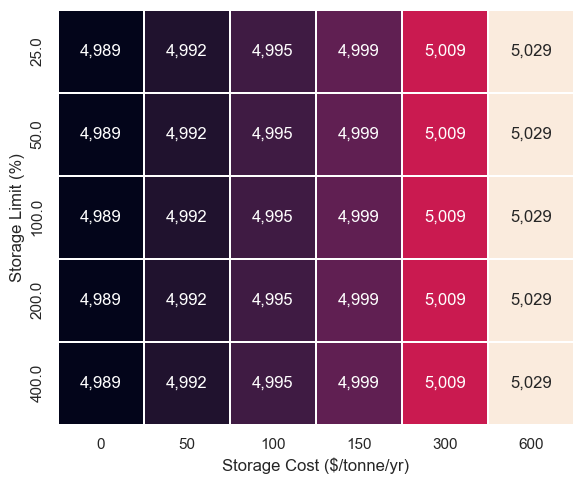

In [6]:
sum_per_battery = ((pin+tin+din)/bat_amt) + acquisition 


fig, ax = plt.subplots(
    figsize=(6,5),
)
sns.heatmap(
    sum_per_battery,
    annot=True,
    fmt=",.0f",
    cbar=False,
    linewidths=0.25,
);
plt.tight_layout()
fig.savefig("figures/whatif-smallProblem/HeatMapCostPerBat.pdf", dpi=300)
# fig.savefig("figures/whatif/HeatMapCostPerBat.png", dpi=300)

### Plant Utilization

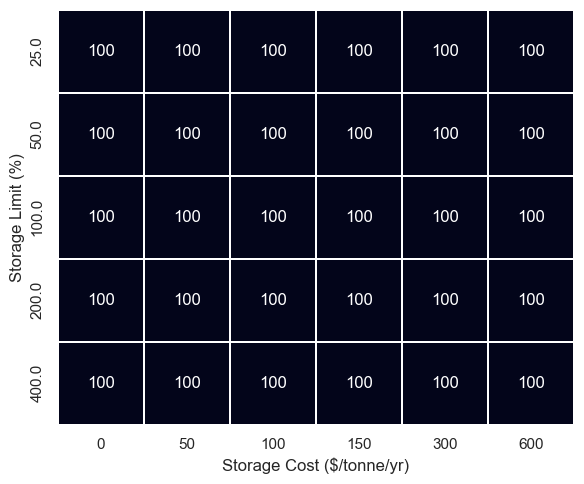

In [7]:
summary = pdata.groupby([
    "Storage Limit (%)",
    "Storage Cost ($/tonne/yr)"
]).mean()[
    "utilization factor (%)"
].reset_index().pivot(
    "Storage Limit (%)",
    "Storage Cost ($/tonne/yr)",
    "utilization factor (%)",
)

fig, ax = plt.subplots(
    figsize=(6,5),
)
sns.heatmap(
    summary,
    annot=True,
    fmt=",.0f",
    cbar=False,
    linewidths=0.25,
);
plt.tight_layout()

fig.savefig("figures/whatif-smallProblem/HeatMapUtilization.pdf", dpi=300)
# fig.savefig("figures/whatif/HeatMapCostPerBat.png", dpi=300)